In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
from GA_functions import fitness, select_parents, crossover, mutation, GA_algorithm, GA_algorithm_unnormalized, conc_to_spectra, perform_iteration, set_seed #normalize_and_pca
from tree_search_functions import zeroth_iteration, nth_iteration, plot_fitness, plot_spectra

## Initialize and Load Data

In [2]:
#This block of code creates random concentrations and spectra to start the algorithm.
Sample_concentrations = pd.read_excel('Sample_concentrations.xlsx')
red_conc = Sample_concentrations[['Red vol frac']].values
green_conc = Sample_concentrations[['Green vol frac']].values
blue_conc = Sample_concentrations[['Blue vol frac']].values
sample_conc = np.hstack((red_conc, green_conc, blue_conc))

sample_spectra = pd.read_excel('Sample_spectra.xlsx')
sample_spectra = np.asarray(sample_spectra)
red = sample_spectra[:,1]
green = sample_spectra[:,2]
blue = sample_spectra[:,3]
wavelength = sample_spectra[:,0]


################ INPUTS #####################################################################
np.random.seed(2)
conc_array = np.random.dirichlet((1, 1,1), 7) #First concentration array to test 
spectra_array = conc_to_spectra(conc_array, sample_spectra[:,1:conc_array.shape[1]+1]) #spectra of the first conc array
#############################################################################################

conc_array_actual = conc_array
spectra_array_actual = spectra_array

#Change Desired Spectra 
objective_row = -1
##################### INPUT ################################################################
x_test = sample_spectra[:,objective_row].reshape(-1,1) #Target spectra
############################################################################################
target_conc = sample_conc[objective_row,:]
print(target_conc)



[0.5073313  0.01445543 0.47821328]


In [3]:
def perform_UV_vis(next_gen_conc, conc_array_actual, spectra_array_actual):
    '''Simulates beers law in samples from next_gen_conc'''
    current_gen_spectra = conc_to_spectra(next_gen_conc, sample_spectra[:,1:sample_conc.shape[1]+1])
    conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
    spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))
    return current_gen_spectra, conc_array_actual, spectra_array_actual

## Analyze Fitness of Zeroth Iteration

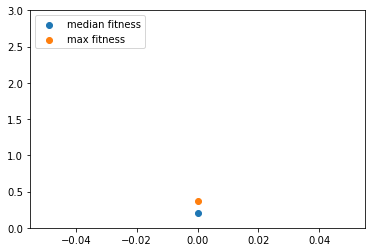

The max fitness is: 0.36857973089843177
The median fitness is: 0.21042007102320298


In [4]:
next_gen_conc, current_gen_spectra, median_fitness_list, max_fitness_list, iteration, mutation_rate_list, mutation_rate_list_2 = zeroth_iteration(conc_array, spectra_array, x_test)

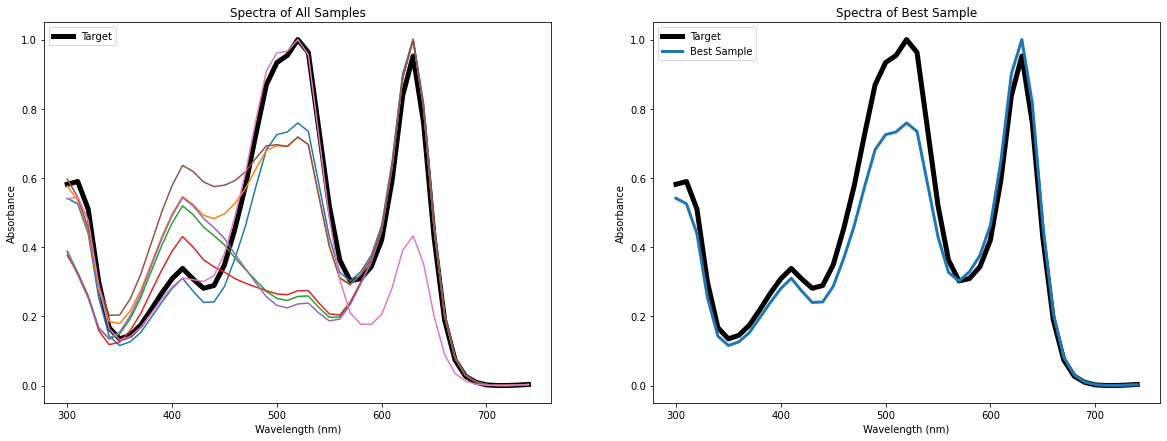

In [5]:
plot_spectra(current_gen_spectra, x_test, wavelength, iteration, False)

## Nth Iteration 

Run the code starting from here to the end for every nth iteration. 

In [35]:
Iterations = 25 #sample size for GA 
Moves_ahead = 3 #moves ahead that are calculated 
GA_iterations = 4 #times per move that the GA is used 
n_samples = 7 #sample size
seed = 2
mutation_rate, mutation_rate_2, mutation_rate_list, mutation_rate_list_2, best_move, best_move_turn, max_fitness, surrogate_score, next_gen_conc, best_conc_array, dictionary_of_moves = nth_iteration(Iterations, Moves_ahead, GA_iterations, n_samples, current_gen_spectra, next_gen_conc, x_test, conc_array_actual, spectra_array_actual, seed, median_fitness_list, max_fitness_list, iteration, mutation_rate_list, mutation_rate_list_2)

The best move has a fitness value of 2.0227741609818772
The best move occurs in 1 turns.

The surrogate model has a score of: 0.9999999998958045

[[0.51222679 0.03973181 0.4480414 ]
 [0.54332405 0.04995069 0.40672527]
 [0.5258865  0.00767896 0.46643454]
 [0.56327663 0.00737055 0.42935283]
 [0.41221883 0.38828949 0.19949168]
 [0.52852111 0.00482149 0.4666574 ]
 [0.51599457 0.00189523 0.48211021]]


In [36]:
next_gen_conc[-1,:] = best_conc_array[:-1]

In [37]:
current_gen_spectra, conc_array_actual, spectra_array_actual = perform_UV_vis(next_gen_conc, conc_array_actual, spectra_array_actual)

The max fitness is: 2.0227848843833374
The median fitness is: 1.2464534153716273


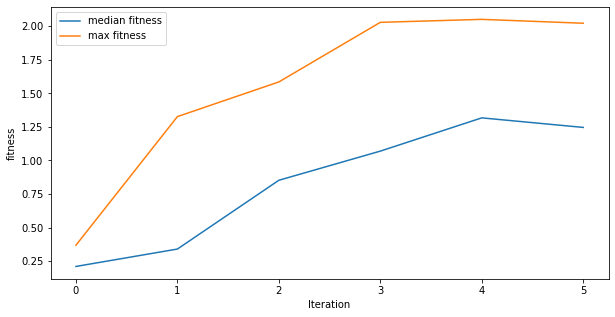

In [38]:
median_fitness_list, max_fitness_list, iteration = plot_fitness(next_gen_conc, current_gen_spectra, x_test, median_fitness_list, max_fitness_list, iteration, False)

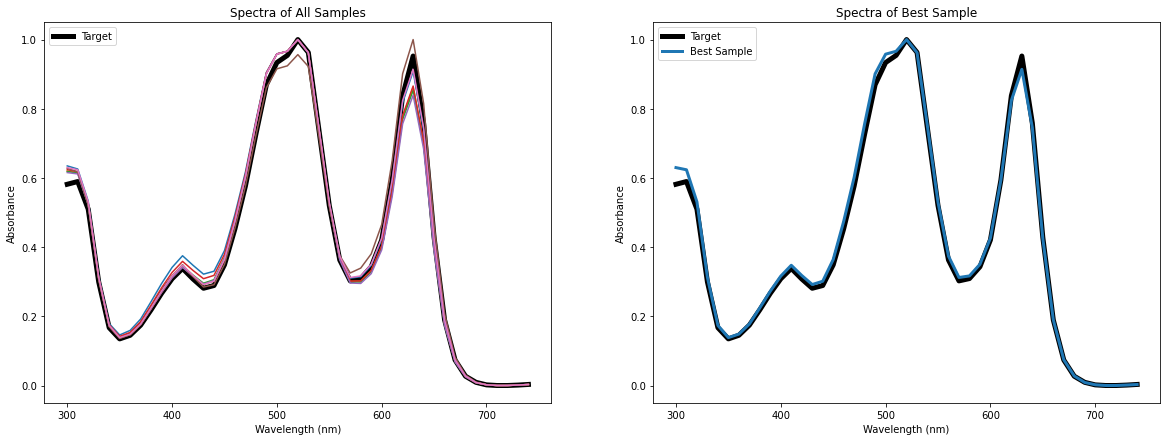

In [31]:
plot_spectra(current_gen_spectra, x_test, wavelength, iteration, False)

In [32]:
best_move

array([[0.2       , 0.7       , 0.3       , 0.1       , 0.6       ,
        0.2       , 1.55662459, 0.98244379, 2.05172467]])

In [33]:
best_conc_array

array([5.17857143e-01, 1.11607143e-03, 4.81026786e-01, 2.05172467e+00])

In [34]:
next_gen_conc

array([[0.51613574, 0.03973181, 0.44413245],
       [0.5345309 , 0.0025925 , 0.46287659],
       [0.53668199, 0.00766689, 0.45565112],
       [0.53094592, 0.0245016 , 0.44455248],
       [0.54172387, 0.00451192, 0.45376421],
       [0.47878904, 0.00465287, 0.51655809],
       [0.51785714, 0.00111607, 0.48102679]])

In [32]:
dictionary_of_moves

{1: array([[0.4       , 0.6       , 1.73103935],
        [0.        , 0.2       , 1.28188452],
        [0.5       , 0.1       , 1.19292827],
        [0.4       , 0.2       , 1.92968167],
        [0.4       , 0.3       , 2.02958952],
        [0.3       , 0.5       , 1.39472752],
        [0.2       , 0.2       , 1.27534746],
        [0.6       , 0.6       , 1.26004313],
        [0.3       , 0.5       , 1.39472752],
        [0.3       , 0.5       , 1.39472752],
        [0.6       , 0.4       , 1.27235027],
        [0.5       , 0.8       , 1.18839881],
        [0.1       , 0.6       , 1.27039244],
        [0.5       , 0.2       , 1.19292827],
        [0.2       , 0.7       , 1.27902924],
        [0.8       , 1.        , 1.07386652],
        [0.9       , 0.5       , 1.52018044],
        [0.5       , 0.9       , 1.18723084],
        [0.8       , 0.3       , 1.14779122],
        [0.1       , 0.6       , 1.27039244],
        [0.5       , 0.4       , 1.24017583],
        [0.1       , 0.4       